# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. This dataset is originally taken from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).

### Dataset Columns

#### PatientId
* Identification of a patient.

#### AppointmentID
* Identification of each appointment.

#### Gender

* Male or Female.

#### ScheduledDay
* The day the patient set up their appointment.

#### AppointmentDay
* The actual day of the appointment.

#### Age
* How old the patient is.

#### Neighbourhood
* The location of the hospital.

#### Scholarship
* True of False. Whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

#### Hipertension
* True or False

#### Diabetes
* True or False

#### Alcoholism
* True or False

#### Handcap
* True or False

#### SMS_received
* 1 or more messages sent to the patient.

#### No-show
* 'Yes' or 'No'. 'Yes' means the patient did not come, while 'No' means that the patient visited the doctor on the appointment day.

### Question(s) for Analysis

The factors that are important for us to know in which cases patients will not visit the scheduled appointment:

1. Which age and gender groups had the most number of 'No-show' cases?
2. Which locations had the most number of 'No-show' cases?
3. People suffering from which illness had the most number of 'No-show' cases?
4. Do the appointment days have an impact on the number of 'No-show' cases?

In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==1.1.5

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# load the dataset
df = pd.read_csv("./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

In [5]:
# see the first few lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# number of rows and columns
df.shape

(110527, 14)

In [7]:
# check the data types and see if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# get the descriptive statistics about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There seems to be issues with the values of the **Age** and **Handcap** columns. The minimum age cannot be -1. **Handcap** column was also said to contain either *true* or *false* values. We will address these issues in the data cleaning section.


### Data Cleaning

#### Modify the data types

We have seen the problems with the data types of the **ScheduledDay** and **AppointmentDay** columns. We change them to **datetime** from **string**.

In [9]:
# convert the data types to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
# check if the changes are applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Fix the issues with Age and Handcap columns

Let us see which rows have the values below 0 for the **Age** column.

In [11]:
below_zero = df.query('Age < 0')
below_zero

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


We can drop this row as having this age is unrealistic. There must have been a typo.

In [12]:
# drop the row by using its index
df.drop(below_zero.index, inplace=True)

In [13]:
# check if the changes are successful
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


We check the unique values of the **Handcap** column. They should be either 0 or 1 according to the dataset description.

In [14]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [15]:
df.groupby('Handcap').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
Handcap,,,,,,,,,,,,,
0,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285
1,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
2,183,183,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3,3


It looks like the values are given according to the level of handicap severeness as there are a lot of rows with the values larger than 1. Since we are only interested whether the patient has disabilities or not, we can replace the values larger than 1 with 1, which indicates *true*.

In [16]:
# apply lambda function to replace the values
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x >= 1 else 0)

In [17]:
# check if the values are 0 and 1
df['Handcap'].unique()

array([0, 1])

In [30]:
df.groupby('Handcap').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
Handcap,,,,,,,,,,,,,
0,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285,108285
1,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241


In [34]:
# check the values of other columns too
print(df['No-show'].unique())
print(df['Gender'].unique())

['No' 'Yes']
['F' 'M']


We also need to rename some of the column names for better analysis

In [37]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.sample(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
4936,4.735194e+13,5694746,M,2016-05-13 08:56:43,2016-05-18,80,SANTO ANDRÉ,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which age and gender groups had the most number of 'No-show' cases?

Let us first see the percentages of patients who visited the hospital or not using the pie chart.

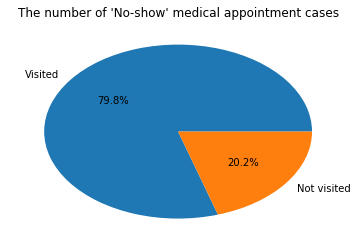

In [77]:
fig, ax = plt.subplots()
no_show_series = df['No_show'].value_counts()
ax.pie(no_show_series.values, labels=['Visited', 'Not visited'], autopct='%1.1f%%')
plt.title("The number of 'No-show' medical appointment cases");

Now we analyse the "No-show" cases in more details.

In [67]:
# Extract only the 'No-show' cases for further analysis
df_no_show = df.query('No_show == "Yes"')

#### Bar chart to see the distribution of 'No-show' cases

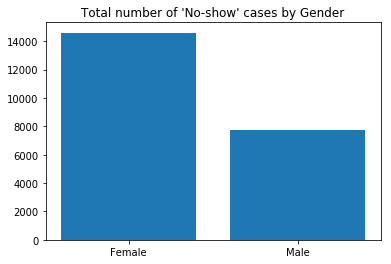

In [76]:
no_show_gender = df_no_show['Gender'].value_counts()
plt.title("Total number of 'No-show' cases by Gender")
plt.bar(['Female', 'Male'], no_show_gender.values);

#### Histograms to illustrate the 'No-show' case distributions among age groups

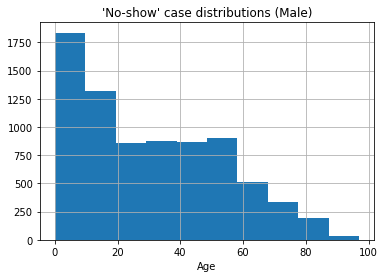

In [81]:
df_no_show.query('Gender == "M"')['Age'].hist()
plt.title("'No-show' case distributions (Male)")
plt.xlabel("Age");

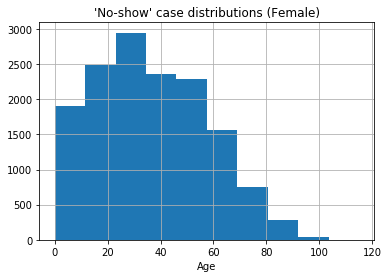

In [82]:
df_no_show.query('Gender == "F"')['Age'].hist()
plt.title("'No-show' case distributions (Female)")
plt.xlabel("Age");

### 2. Which locations had the most number of 'No-show' cases?

In [223]:
df_no_show['Neighbourhood'].value_counts().sort_values(ascending=False)[:10]

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: Neighbourhood, dtype: int64

### 3. People suffering from which illness had the most number of 'No-show' cases?

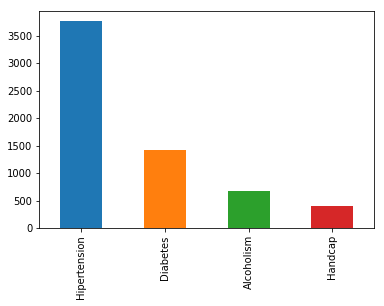

In [198]:
df_no_show[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum().plot(kind='bar');

### 4. Do the appointment days have an impact on the number of 'No-show' cases?

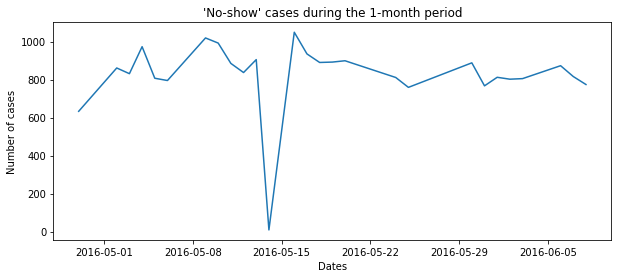

In [131]:
# extracts dates and their counts
noshow_days = df_no_show.groupby('AppointmentDay')['No_show'].count()

# plot the results using the line chart
plt.figure(figsize=(10, 4))
plt.title("'No-show' cases during the 1-month period")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.plot(noshow_days.index, noshow_days.values);

Interestingly, slightly before May 15, 2016 there were almost no 'No-show' cases. Let us find out which date this exactly is.

In [146]:
noshow_days[noshow_days == noshow_days.min()]

AppointmentDay
2016-05-14    9
Name: No_show, dtype: int64

Let us check the total visits on this day.

In [149]:
df.query('AppointmentDay == "2016-05-14"')['No_show'].value_counts()

No     30
Yes     9
Name: No_show, dtype: int64

It looks like there were only 39 appointed visits on this day.

#### Analysis based on the day of the week

We can see from the line chart that there are more 'no-show' cases between similar periods of days. This leads us to analyse the dataset according to the days of the week.

In [183]:
# add the new column with the name of the day of the week according to the corresponding date
df['AppointmentDay_week'] = df['AppointmentDay'].dt.dayofweek

In [184]:
df_no_show.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppointmentDay_week
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,4
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,4
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,4


In [188]:
# get the total count of the cases on the day of the week basis
noshow_weekdays = df_no_show['AppointmentDay_week'].value_counts().sort_index()
noshow_weekdays

0    4690
1    5152
2    5093
3    3338
4    4037
5       9
Name: AppointmentDay_week, dtype: int64

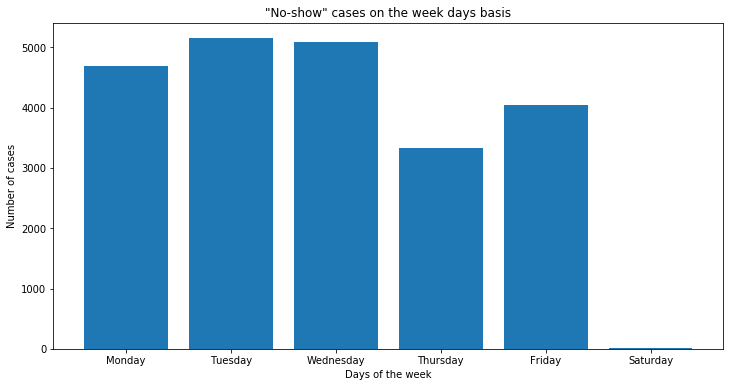

In [196]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(12, 6))
plt.title('"No-show" cases on the week days basis')
plt.xlabel('Days of the week')
plt.ylabel('Number of cases')
plt.bar(noshow_weekdays.index, noshow_weekdays.values, tick_label=labels);

Now it is clear that the date `2016-05-14` was Saturday when there were almost no visits, so the line chart had the sudden drop.

Let us compare the results with the entire dataset's scheduled appointment cases.

In [208]:
# count the total scheduled appointments on the weekly basis
df_weekdays = df['AppointmentDay_week'].value_counts().sort_index()
df_weekdays

0    22714
1    25640
2    25867
3    17247
4    19019
5       39
Name: AppointmentDay_week, dtype: int64

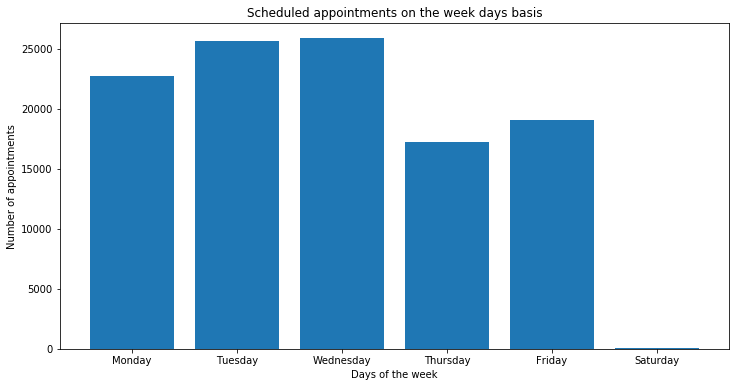

In [209]:
# plot the results using the bar chart
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(12, 6))
plt.title('Scheduled appointments on the week days basis')
plt.xlabel('Days of the week')
plt.ylabel('Number of appointments')
plt.bar(df_weekdays.index, df_weekdays.values, tick_label=labels);

<a id='conclusions'></a>
## Conclusions

The factors that are important for us to know in which cases patients will not visit the scheduled appointment:

#### 1. Which age and gender groups had the most number of 'No-show' cases?

The largest number of **male** patients who did not come to the appointment were members of the 0-20 age group. Meanwhile, the group interval was about 20-40 for the **female** ones. 

#### 2. Which locations had the most number of 'No-show' cases?

The hospitals of `JARDIM CAMBURI` and `MARIA ORTIZ` had the most number of no-show patients during the given period with 1465 and 1219 cases, respectively. 

#### 3. People suffering from which illness had the most number of 'No-show' cases?

The people who suffer from **hypertension** did not come to the appointments most of the times compared to other provided illnesses with the noticeably large difference.

#### 4. Do the appointment days have an impact on the number of 'No-show' cases?

Tuesdays and Wednesdays were the days when the most patients did not show up. Nevertheless, Thursday was the day with the fewest cases. It is worth noting almost no hospitals scheduled the appointment for Saturdays.

There were about 800-1000 no-show cases during the given period.

### Limitations

Due to the lack of scheduled appointment hours in the dataset, it was not possible to analyse the specific parts of the days when the patients would not come.

Moreover, the location, illness and week_day based values of no-show cases were large due to the overall value counts of the dataset. 

## Submitting the Project 

In [225]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0